In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

%matplotlib inline

In [3]:
df = pd.read_excel('bankloans.xlsx')
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [4]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [5]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Length: 700, dtype: int64

In [6]:
df = df.dropna()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

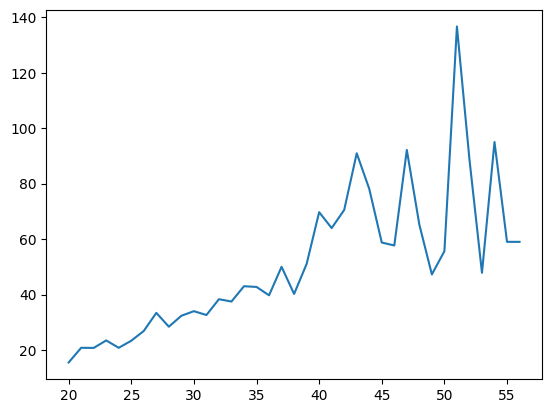

In [7]:
sns.lineplot(x='age',y='income',data=df)

In [9]:
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [10]:
x=df.drop(['default'],axis=1)
y=df['default']

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
sc = StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

# **Creating Model**

Random Forest

In [13]:
rfc = RandomForestClassifier(n_estimators=200)

In [14]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [15]:
rfc.score(xtest,ytest)

0.8

In [16]:
rfc2 = cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)
rfc2.mean()

0.7767857142857143

SVM

In [17]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [18]:
sv.score(xtest,ytest)

0.7928571428571428

In [19]:
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [20]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [21]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [22]:
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.8214285714285714

In [23]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.8357142857142857

<AxesSubplot: >

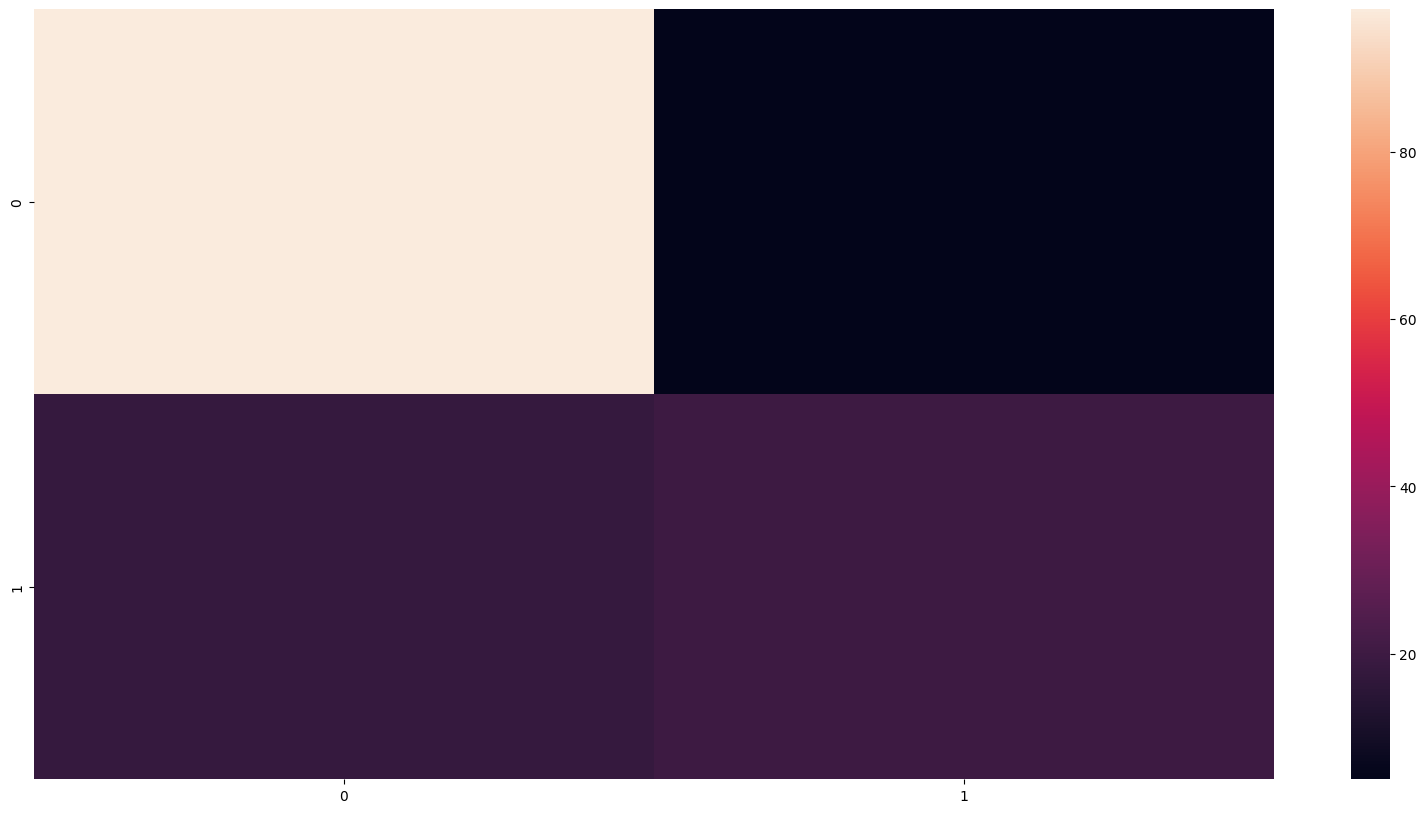

In [24]:
yp = lr.predict(xtest)
c= confusion_matrix(ytest,yp)
fig ,ax = plt.subplots(figsize=(20,10))
sns.heatmap(c,ax=ax)

In [25]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(solver = 'lbfgs', max_iter=1000, fit_intercept=True, tol=0.0001, C=1, penalty='l2')
logit_model.fit(xtrain, ytrain)

LogisticRegression(C=1, max_iter=1000)

In [27]:
from sklearn.metrics import accuracy_score

y_pred_train = logit_model.predict(xtrain)
acc_train = accuracy_score(y_pred_train, ytrain)
y_pred_test = logit_model.predict(xtest)
acc_test = accuracy_score(y_pred_test, ytest)

print('accuracy on train: ', acc_train)
print('accuracy on test: ', acc_test)

accuracy on train:  0.8053571428571429
accuracy on test:  0.8357142857142857


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13464\1971022063.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13464\1971022063.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


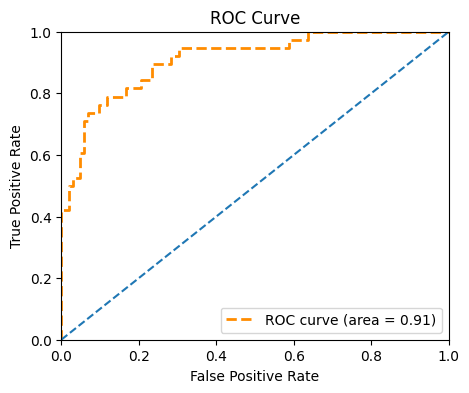

In [29]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_test = logit_model.predict_proba(xtest)[:, 1]
fpr, tpr, thres = roc_curve(ytest, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (5,4))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)